### Import libraries

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
df = pd.read_csv('data/Phishing_Email.csv', index_col=0)
display(df.head())

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


### Text Processing

In [3]:
# Count the number of null
print(df.isnull().sum())

Email Text    16
Email Type     0
dtype: int64


In [4]:
# Remove rows containing NaN values
df = df.dropna(subset=["Email Text"])

In [5]:
# Count the number of duplicate
print(df.duplicated().sum())
df = df.drop_duplicates()

1096


In [6]:
# there are 17539 rows, 2 columns
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


**Plotting the pie chart**

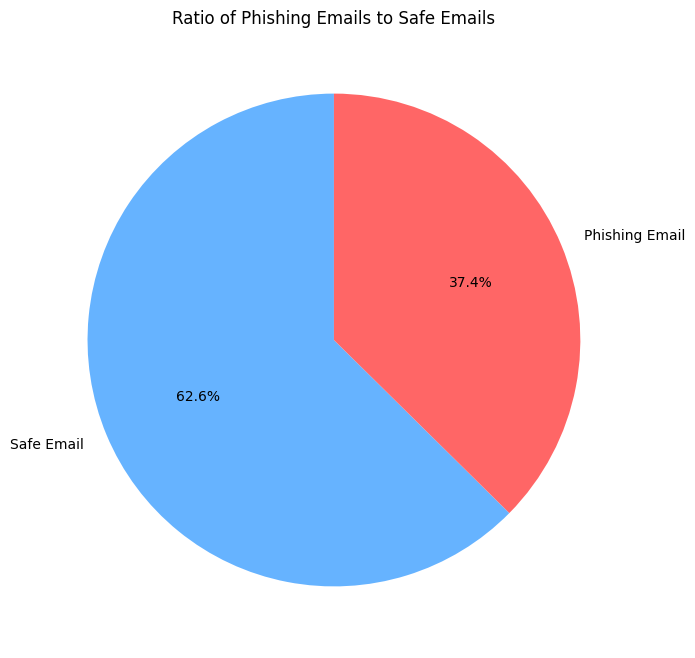

In [7]:
email_counts = df['Email Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(email_counts, labels=email_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])

plt.title('Ratio of Phishing Emails to Safe Emails')
plt.show()

**Label Encoding**  
Safe email -> 1  
Phishing email -> 0

In [8]:
le = LabelEncoder()
df["Email Type"] = le.fit_transform(df["Email Type"])
display(df)

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0
...,...,...
18645,\nRick Moen a Ã©crit:> > I'm confused. I thou...,1
18646,date a lonely housewife always wanted to date ...,0
18647,request submitted : access request for anita ....,1
18648,"re : important - prc mtg hi dorn & john , as y...",1


**Remove hyperlinks, punctuations, extra space**

In [9]:
def clean_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['Email Text'] = df['Email Text'].apply(clean_text)

In [10]:
display(df.head())
df.to_csv('data/Cleaned_Phishing_Email.csv', index=False)
new_df = pd.read_csv('data/Cleaned_Phishing_Email.csv')
print(new_df.isnull().sum())

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,Hello I am your hot lil horny toy I am the one...,0
4,software at incredibly low prices 86 lower dra...,0


Email Text    2
Email Type    0
dtype: int64


The TfidfVectorizer converts the text data (the email content)
into numbers that a machine learning model can understand.
TF-IDF stands for Term Frequency-Inverse Document Frequency.
It gives more importance to words that are unique and less importance to common words.

In [11]:
tf = TfidfVectorizer(stop_words="english", max_features=10000)
feature_x = tf.fit_transform(df["Email Text"]).toarray()

Once the vectorizer has learned from the data, it converts the email text into a matrix of TF-IDF features. 

Here, `feature_x` represents a **2D matrix** where:
- **Rows** correspond to individual emails.
- **Columns** correspond to unique words or terms found across all the emails in the dataset (the vocabulary).
- **Values** represent the **TF-IDF score** for each word in each email. This score reflects how important a word is within a particular email, relative to how common that word is across all emails.

After applying the TF-IDF vectorization, `feature_x` might look like this:

| Email   | Buy  | now  | Limited | time  | offer | valid |
|---------|------|------|---------|-------|-------|-------|
| Email 1 | 0.5  | 0.7  | 0.0     | 0.0   | 0.0   | 0.0   |
| Email 2 | 0.0  | 0.0  | 0.6     | 0.6   | 0.6   | 0.0   |
| Email 3 | 0.0  | 0.5  | 0.0     | 0.0   | 0.5   | 0.5   |

### Numpy Array Conversion: Label Indexing

The Numpy array `y_tf` stores the labels corresponding to each email from the original DataFrame. 

- The **index** of the array matches the **row number** of the DataFrame.
- For example, `y_tf[0]` represents the label of the **first email** in the dataset (the first row of the DataFrame). 
  - If `y_tf[0] = 1`, the first email is **non-spam**.
  - If `y_tf[0] = 0`, the first email is **spam**.

In [12]:
y_tf = np.array(df['Email Type'])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(feature_x, y_tf, train_size=0.8, random_state=0)

In [14]:
# Save the TF-IDF features and labels
np.save('feature_x.npy', feature_x)
np.save('y_tf.npy', y_tf)

### Dividing the Dataset into Train and Test Sets

The `train_test_split()` function splits the dataset into training and testing sets.

- **`train_size=0.8`**: 80% of the data is used for training the model, while 20% is reserved for testing.
- **`random_state=0`**: Ensures reproducibility of the split. The same split will be generated every time the code is run.
